##### import numpy as np
import pandas as pd

In [197]:
import matplotlib.pyplot as plt

In [198]:
def calc_mse(y, y_pred):
    """MSE calculation function. General"""
    err = np.mean((y - y_pred)**2)
    return err

In [199]:
def standard_scale(X):
    """Function is used for standartization"""
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [200]:
def norm(item):
    total = 0
    for elem in item:              
        total += elem**2
    return np.sqrt(total)

## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

Данные для ЕГЭ.  
Примем в качестве исходных данных датасет по ЕГЭ с расширением

In [201]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [202]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Функция градиентного спуска с L2 регуляризацией.
в отличие от исходной функции, добавлен выход из цикла при достижении определеннлй величины разности весов.

In [253]:
def gradient_descent_reg_l2(X, y, iterations, eta, reg, epsilon = 1e-9):
    """Функция высчитывает величину градиента и применияет ее
    к весам до конца количества итераций или до достижения поределенной разницы
    в весах"""
    #----------------------------------------------------------
    #CHANGE
    #----------------------------------------------------------
    W_old = None    
    #----------------------------------------------------------
   
    W = np.random.randn(X.shape[1]) #веса
    n = X.shape[0] #
    
    for i in range(0, iterations):
        #----------------------------------------------------------
        #CHANGE
        #----------------------------------------------------------
        W_old = W.copy()
        #----------------------------------------------------------
        
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W                # градиент регуляризации
        W -= eta * (dQ + dReg)
        
        
        #----------------------------------------------------------
        #CHANGE
        #----------------------------------------------------------
        #if abs(norm(W_old)-norm(W)) < epsilon:
        #    break
        #----------------------------------------------------------
    return  W

Применим стандартизацию к исходному набору признаков, т.к. величины в оригинальном наборе имеют разный порядок.

In [234]:
X_st = X.copy().astype(np.float64)

In [235]:
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [236]:
X_st[0:5]

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064]])

Создадим список различных значений лямбда для которого будем оценивать параметры

In [237]:
counter = 100

In [257]:
lambda_array = np.logspace(-5, 1, num=counter)

In [258]:
lambda_array

array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1.41747416e-04,
       1.62975083e-04, 1.87381742e-04, 2.15443469e-04, 2.47707636e-04,
       2.84803587e-04, 3.27454916e-04, 3.76493581e-04, 4.32876128e-04,
       4.97702356e-04, 5.72236766e-04, 6.57933225e-04, 7.56463328e-04,
       8.69749003e-04, 1.00000000e-03, 1.14975700e-03, 1.32194115e-03,
       1.51991108e-03, 1.74752840e-03, 2.00923300e-03, 2.31012970e-03,
       2.65608778e-03, 3.05385551e-03, 3.51119173e-03, 4.03701726e-03,
       4.64158883e-03, 5.33669923e-03, 6.13590727e-03, 7.05480231e-03,
       8.11130831e-03, 9.32603347e-03, 1.07226722e-02, 1.23284674e-02,
       1.41747416e-02, 1.62975083e-02, 1.87381742e-02, 2.15443469e-02,
      

После применения стандартизации приименим функцию градиентного спуска с L2 регуляризацией и по возвращенным данным построим визуализацию.

In [259]:
W_total = np.empty([counter, X.shape[1]], dtype=np.float64)

In [260]:
for j in range(counter):
    reg = lambda_array[j]
    eta=1e-2
    iterations=5000
    W_graph = gradient_descent_reg_l2(X_st, y, iterations, eta, reg)
    #print(W_graph)
    W_total[j] = W_graph
    

Массив с окончательным значением весов

In [261]:
W_total

array([[ 5.64997175e+01,  6.30298980e+00, -3.56048080e-01,
         6.57120323e+00],
       [ 5.64996752e+01,  6.30297491e+00, -3.56000142e-01,
         6.57116487e+00],
       [ 5.64996266e+01,  6.30296704e+00, -3.55989701e-01,
         6.57115765e+00],
       [ 5.64995706e+01,  6.30294877e+00, -3.55933130e-01,
         6.57111255e+00],
       [ 5.64995063e+01,  6.30292525e+00, -3.55855972e-01,
         6.57105070e+00],
       [ 5.64994324e+01,  6.30292034e+00, -3.55874070e-01,
         6.57106775e+00],
       [ 5.64993474e+01,  6.30290357e+00, -3.55841234e-01,
         6.57104308e+00],
       [ 5.64992497e+01,  6.30287006e+00, -3.55734763e-01,
         6.57095799e+00],
       [ 5.64991373e+01,  6.30282596e+00, -3.55585430e-01,
         6.57083795e+00],
       [ 5.64990081e+01,  6.30279541e+00, -3.55511010e-01,
         6.57078021e+00],
       [ 5.64988596e+01,  6.30275585e+00, -3.55404113e-01,
         6.57069623e+00],
       [ 5.64986888e+01,  6.30269907e+00, -3.55226621e-01,
      

Приведем картину распределения весов для признаков в 3D, несмотря на обзую низкую наглядность графика в данном слуяае.

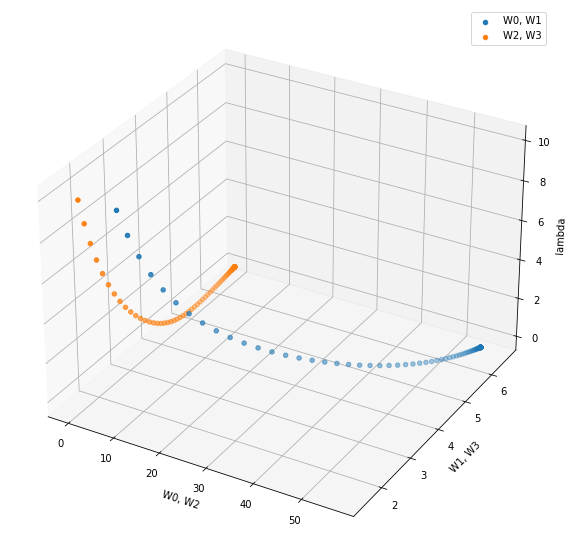

In [262]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(W_total[:, 0], W_total[:, 1], lambda_array, label='W0, W1')
ax.scatter(W_total[:, 2], W_total[:, 3], lambda_array, label='W2, W3' )
ax.legend()
ax.set_xlabel('W0, W2')
ax.set_ylabel('W1, W3')
ax.set_zlabel('lambda')
plt.show()

Распределение весов в зависимости от Lambda. Совмещенный график

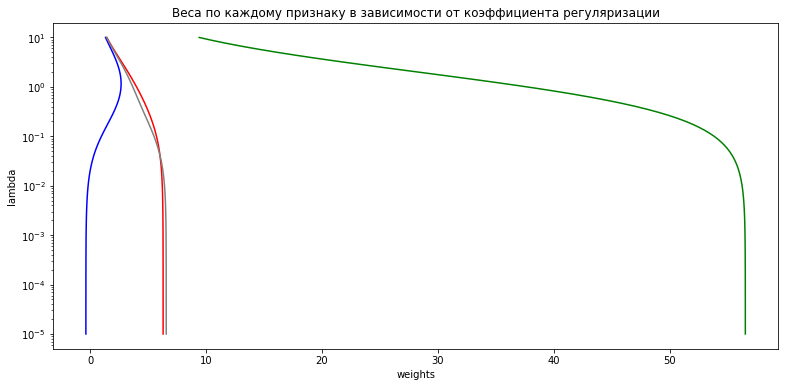

In [263]:
plt.figure(figsize=(13, 6))
plt.xlabel('weights')
plt.ylabel('lambda')
plt.yscale('log')
#plt.ylim(lambda_array.min(), lambda_array.max())
#plt.xlim(W_total[:,3].min(), W_total[:,1].max())
plt.title("Веса по каждому признаку в зависимости от коэффициента регуляризации")
plt.plot(W_total[:,0], lambda_array, color='g')
plt.plot(W_total[:,1], lambda_array, color='r')
plt.plot(W_total[:,2], lambda_array, color='b')
plt.plot(W_total[:,3], lambda_array, color='grey')

График нормализованных значений весов по L2 норме в зависимости от величины Lambda

In [264]:
W_normal = np.array(list(map(norm, W_total)))

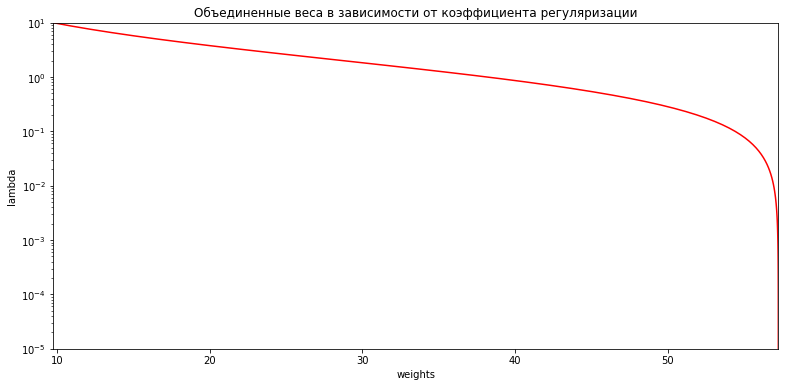

In [265]:
plt.figure(figsize=(13, 6))
plt.xlabel('weights')
plt.ylabel('lambda')
plt.yscale('log')
plt.ylim(lambda_array.min(), lambda_array.max())
plt.xlim(W_normal.min(), W_normal.max())
plt.title("Объединенные веса в зависимости от коэффициента регуляризации")
plt.plot(W_normal, lambda_array, color='r')

**Выводы**  
По результатам построения графиков все выглядит так, что с увеличением лямбды веса стремятся к уменьшению, что согласуется с теорией.  
При этом для маленьких значений коэффициента веса остаются сравнительно стабильными достаточно долгое время.
Можно предположить, что для каждого набора данных существует оптимальный коэффициент регуляризации.


**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

Исходная функция с L2 регуляризацией.

In [ ]:
def gradient_descent_reg_l2(X, y, iterations, eta, reg):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

Производная:
    $$d\lambda |w| = lambda$$  
Нужно также учитывать знак, который был перед применением производной.  
Для этого применим функцию np.sign()

Модифицированная функция для мспользования L1 регуляризаци

In [ ]:
def gradient_descent_reg_l1(X, y, iterations, eta, reg):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        
        #---------------------------------------------------------------
        #CHANGES
        #---------------------------------------------------------------
        dReg = reg * np.sign(W) # градиент регуляризации
        #----------------------------------------------------------------
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

3. **Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

Как и говорилось на занятии, можно, но в значительной мере бесмыссленно. Т.к. конечный результат большей частью будет определятся тем, что было применено последним.

**4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [266]:
from sklearn.datasets import make_regression

In [267]:
X, y = make_regression(n_samples = 1000, n_features=4, noise = 1.5)

In [268]:
iterations = 10000

In [269]:
epsilon = 1e-10
eta = 1e-4

In [270]:
def gd(X, y, iterations, eta, epsilon):
    mse_array = list()
    W_old = [1, 1]
    
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        #-----------------------------------------------
        mse_array.append([i, err])
        W_old = W.copy() 
        #------------------------------------------------
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
        #--------------------------------------------------
        if abs(norm(W_old)-norm(W)) < epsilon:
            break
        #-------------------------------------------------
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return mse_array

In [271]:
def sgd(X, y, iterations, batch_size, eta, epsilon):
    mse_array = list()
    W_old = None
    #-----------------------------------------------
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
        
    for i in range(0, iterations):        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)            
        
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]
            
            y_pred = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred)
            
            mse_array.append([i, err])
            
            y_pred_tmp = np.dot(X_tmp, W)
            
            W_old = W.copy()
            
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
        #--------------------------------------------------
        if abs(norm(W_old)-norm(W)) < epsilon:
            break
        #-------------------------------------------------
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return mse_array

In [272]:
gd_data = np.array(gd(X, y, iterations, eta, epsilon))

Final MSE: 371.1879456169733


In [276]:
batch_size = 4
gcd_data = np.array(sgd(X, y, iterations, batch_size, eta, epsilon))

Final MSE: 2.453115986541278


In [277]:
values = np.arange(0, iterations)

Выведем полученные значения в графике

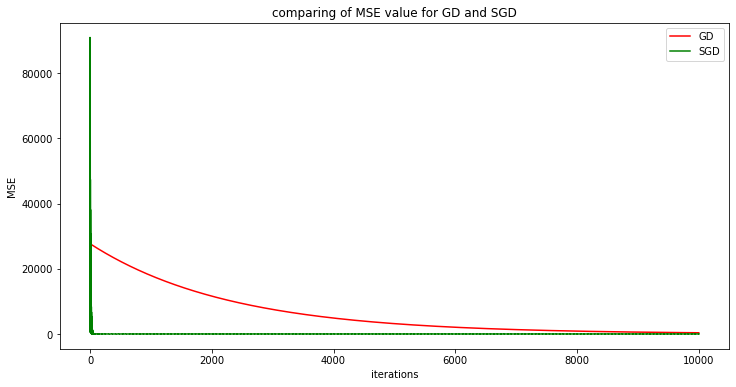

In [278]:
fig, ax = plt.subplots()
ax.plot(gd_data[:,0], gd_data[:,1], color='r', label = 'GD')
ax.plot(gcd_data[:,0], gcd_data [:,1], color='g', label = 'SGD')
ax.legend()
plt.title('comparing of MSE value for GD and SGD')
plt.xlabel('iterations')
plt.ylabel('MSE')
fig.set_figheight(6)
fig.set_figwidth(12)
plt.show()

При большой величине Batch_size графики достаточно неплохо совпадают, но при более низких параметрах SGD достигает передельного значения намного быстрее.  
При этом SGD в данной реализации требует значительно больше времени на расчет.
Более широкая линия графика в SGD позволяет предположить  колебания MSE, но при общем снижении ее величины.